In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import qutip as qt
from qutip import gates as gt
import qutip_qip as qip

In [148]:
N=41
step = 0.5

vacuum = qt.coherent(N, 0.0)
qubit0 = qt.basis(2,0)
qubit1 = qt.basis(2,1)

plus  = (qt.basis(2,0) + qt.basis(2,1))/np.sqrt(2.)
minus = (qt.basis(2,0) - qt.basis(2,1))/np.sqrt(2.)

plusy = (qt.basis(2,0) + 1.0j * qt.basis(2,1))/np.sqrt(2.)

proj_plus  =   plus.proj()
proj_minus =  minus.proj()

displace_x   = qt.tensor(qt.displace(N, step) , proj_plus) + qt.tensor(qt.displace(N, -step) , proj_minus) 

In [149]:
def chi_re(state, alpha):
    s0 = qt.tensor(state, qubit0)
    s1 = (qt.tensor(qt.displace(N, alpha) , proj_plus) + qt.tensor(qt.displace(N, -alpha) , proj_minus) ) * s0
    p0 = np.abs(s1.ptrace(1)[1][1])
    return p0

def chi_im(state, alpha):
    s0 = qt.tensor(state, plusy)
    s1 = (qt.tensor(qt.displace(N, alpha) , proj_plus) + qt.tensor(qt.displace(N, -alpha) , proj_minus) ) * s0
    p0 = np.abs(s1.ptrace(1)[1][1])
    return p0

In [150]:
alpha = np.linspace(0.0, 2.5, 40)
chi_re_array = []
chi_im_array = []
oscillator = qt.basis(N, 3)
for a in alpha:
    p_re = chi_re(oscillator, a)
    p_im = chi_im(oscillator, a)
    chi_re_array.append(p_re)
    chi_im_array.append(p_im)

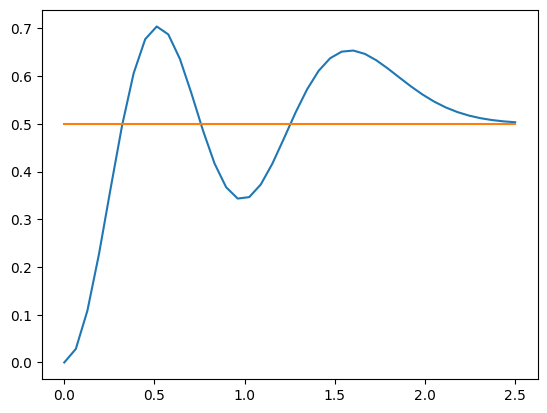

In [151]:
plt.plot(alpha, chi_re_array)
plt.plot(alpha, chi_im_array)

In [152]:
def chi_array_ions(oscillator):
    ax = np.linspace(-3., 3., 40)
    ay = np.linspace(-3., 3., 40)

    c_re = []
    c_im = []
    for y in ax:
        yline_re = []
        yline_im = []
        for x in ay:
            yline_re.append( chi_re(oscillator, x + 1.j*y) )
            yline_im.append( chi_im(oscillator, x + 1.j*y))
        c_re.append(yline_re)
        c_im.append(yline_im)
    return (ax, ay, c_re, c_im)

In [199]:
oscillator = qt.basis(N, 2)
ax, ay, c_re, c_im = chi_array_ions(oscillator)

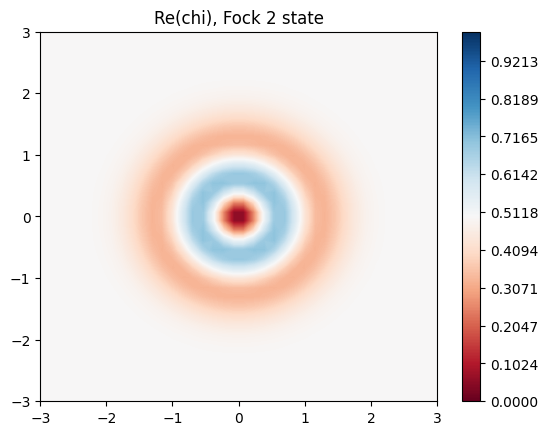

In [200]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_re, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Re(chi), Fock 2 state")
plt.show()

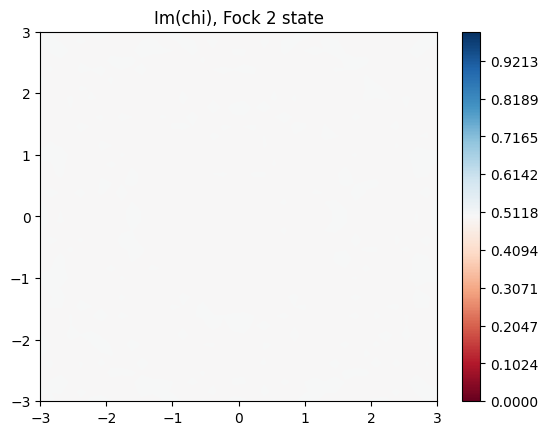

In [201]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_im, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Im(chi), Fock 2 state")
plt.show()

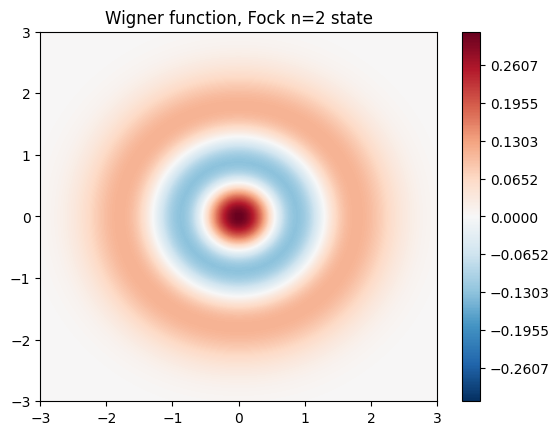

In [203]:
xvec = np.linspace(-3, 3, 100)
wlevels = np.linspace(-1./np.pi, 1./np.pi, 255)
Wsolved = qt.wigner(oscillator, xvec, xvec)
plt.contourf(xvec, xvec, Wsolved, 100, levels = wlevels, cmap=cm.RdBu.reversed())
plt.title("Wigner function, Fock n=2 state")
plt.colorbar()
plt.show()

In [175]:
# Cubic gate 
oscillator = qt.basis(N, 0)
res = qt.sesolve( (qt.create(N) + qt.create(N).dag())**3/np.sqrt(32.0), oscillator, [0.0, 1.0])

In [176]:
o_x3 = res.states[-1]

In [191]:
ax, ay, c_re, c_im = chi_array_ions(o_x3)

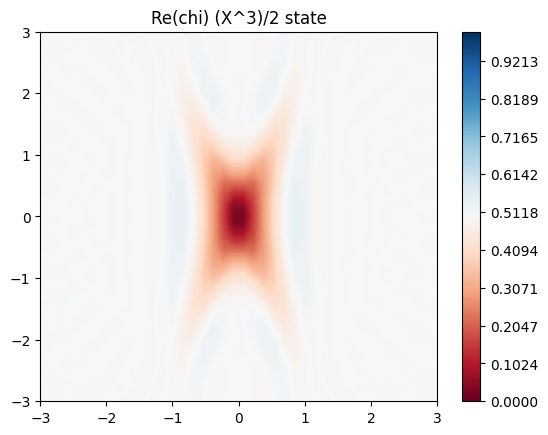

In [192]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_re, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Re(chi) (X^3)/2 state")
plt.show()

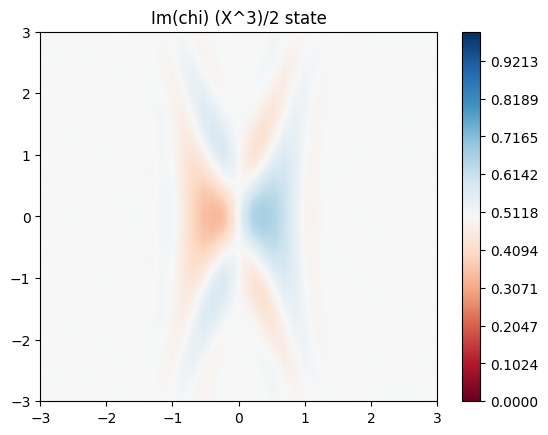

In [193]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_im, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Im(chi) (X^3)/2 state")
plt.show()

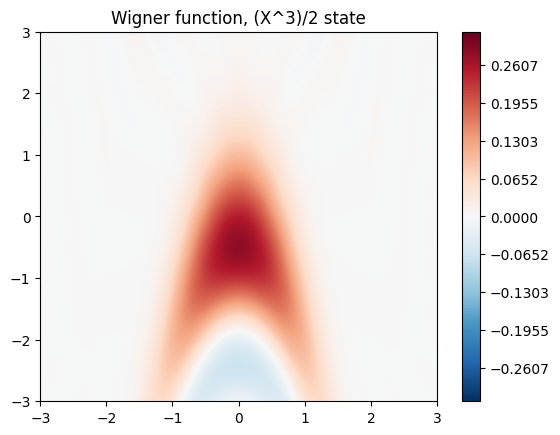

In [194]:
xvec = np.linspace(-3, 3, 100)
wlevels = np.linspace(-1./np.pi, 1./np.pi, 255)
Wsolved = qt.wigner(o_x3, xvec, xvec)
plt.contourf(xvec, xvec, Wsolved, 100, levels = wlevels, cmap=cm.RdBu.reversed())
plt.title("Wigner function, (X^3)/2 state")
plt.colorbar()
plt.show()

In [195]:
oscillator = qt.coherent(N, 1.5)
ax, ay, c_re, c_im = chi_array_ions(oscillator)

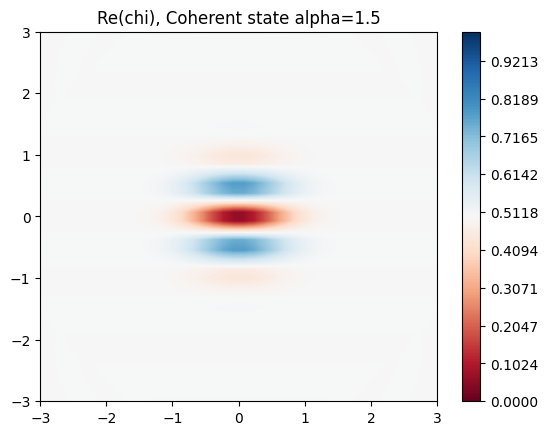

In [196]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_re, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Re(chi), Coherent state alpha=1.5")
plt.show()

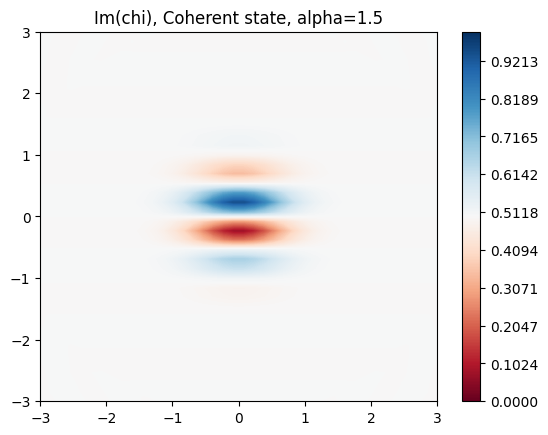

In [197]:
levels = np.linspace(0.0, 1.0, 255)
plt.contourf(ax, ay, c_im, 100, levels=levels, cmap=cm.RdBu)
plt.colorbar()
plt.title("Im(chi), Coherent state, alpha=1.5")
plt.show()

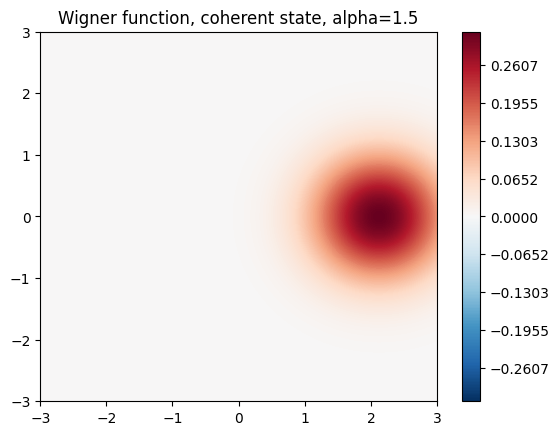

In [198]:
xvec = np.linspace(-3, 3, 100)
wlevels = np.linspace(-1./np.pi, 1./np.pi, 255)
Wsolved = qt.wigner(oscillator, xvec, xvec)
plt.contourf(xvec, xvec, Wsolved, 100, levels = wlevels, cmap=cm.RdBu.reversed())
plt.title("Wigner function, coherent state, alpha=1.5")
plt.colorbar()
plt.show()